## **Sea level rise: projections for the future**

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected. There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent;
2. you will evaluate the goodness-of-fit of these models;
3. you will compare linear models using data covering different time scales and make projections for future sea levels.


### **PART 1 - Background**

Good data science and machine learning (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>Identify three online resources that 1.) describe how sea level has been measured historically, 2.) discuss variability in sea level measurements across the globe, and 3.) provide projections and implications for the future.  Give links to these references below.</b>

Here are three accessible online resources that provide comprehensive information on sea level measurements, variability, and future projections:  

1. Historical Sea Level Measurement Methods  
   - NOAA Climate.gov: "Reading between the tides: 200 years of measuring global sea level"  
   This article details the evolution of sea level measurement techniques over the past two centuries, from manual tide staffs to advanced satellite altimetry.  
   [https://www.climate.gov/news-features/climate-tech/reading-between-tides-200-years-measuring-global-sea-level](https://www.climate.gov/news-features/climate-tech/reading-between-tides-200-years-measuring-global-sea-level)  

2. Variability in Sea Level Measurements Across the Globe
   - NASA Climate Change: "Sea Level"  
   This resource discusses the factors contributing to regional differences in sea level changes, including ocean currents, land elevation changes, and gravitational effects.  
   [https://climate.nasa.gov/vital-signs/sea-level/](https://climate.nasa.gov/vital-signs/sea-level/)  

3. Projections and Implications for the Future   
   - U.S. Sea Level Change: "2022 Technical Report"  
   This technical report provides projections of future sea level rise along U.S. coastlines, discussing potential impacts and the importance of mitigation efforts.  
   [https://sealevel.globalchange.gov/resources/2022-sea-level-rise-technical-report/](https://sealevel.globalchange.gov/resources/2022-sea-level-rise-technical-report/)  

These resources should offer valuable insights into the historical context, regional variability, and future expectations regarding sea level changes.

### **PART 2 - Loading the data**

Here, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed.  Load the data from the above URL directly (i.e., do not download the data and then reupload to Google Drive) using pandas `read_csv()` function into a DataFrame named `noaa`.  Note, you'll have to skip the first 5 rows.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.metrics import r2_score
import plotly.express as px

In [ ]:
noaa = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_ref_90.csv", skiprows = 5)

<b>Print the head of the DataFrame to get a sense of the contents using the DataFrame's `.head()` method.</b>

In [ ]:
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF
0,1992.9614,-19.33,NaN,NaN,NaN,NaN
1,1992.9865,-22.59,NaN,NaN,NaN,NaN
2,1993.0123,-24.03,NaN,NaN,NaN,NaN
3,1993.0406,-23.94,NaN,NaN,NaN,NaN
4,1993.0641,-24.22,NaN,NaN,NaN,NaN


### **PART 3 - Aggregating and plotting the data**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the four satellite columns and store it as another column within the DataFrame called `"max_level"`.</b>

In [ ]:
noaa["max_level"] = noaa[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]].max(axis=1)
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level
0,1992.9614,-19.33,NaN,NaN,NaN,NaN,-19.33
1,1992.9865,-22.59,NaN,NaN,NaN,NaN,-22.59
2,1993.0123,-24.03,NaN,NaN,NaN,NaN,-24.03
3,1993.0406,-23.94,NaN,NaN,NaN,NaN,-23.94
4,1993.0641,-24.22,NaN,NaN,NaN,NaN,-24.22


<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary.</b>

<small>$^{\dagger}$ you can use `noaa.plot?` to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

In [ ]:
plt.style.use("seaborn-v0_8-white")

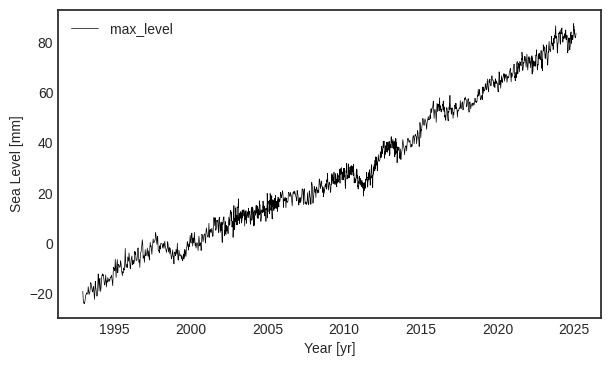

In [ ]:
ax = noaa.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="black", linewidth=0.5, figsize=(7, 4))
plt.show()

Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a `"max_level"` column that is the max sea level for that region .</b>

In [ ]:
pacific = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_pac_free_ref_90.csv", skiprows=5)
pacific["max_level"] = pacific[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]].max(axis=1)
pacific.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level
0,1992.7945,-5.32,NaN,NaN,NaN,NaN,-5.32
1,1992.8258,-10.27,NaN,NaN,NaN,NaN,-10.27
2,1992.8493,-10.17,NaN,NaN,NaN,NaN,-10.17
3,1992.8779,-17.21,NaN,NaN,NaN,NaN,-17.21
4,1992.9052,-9.16,NaN,NaN,NaN,NaN,-9.16


In [ ]:
atlantic = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_atl_free_ref_90.csv", skiprows=5)
atlantic["max_level"] = atlantic[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]].max(axis=1)
atlantic.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level
0,1992.7948,-14.83,NaN,NaN,NaN,NaN,-14.83
1,1992.8260,-31.66,NaN,NaN,NaN,NaN,-31.66
2,1992.8499,-24.96,NaN,NaN,NaN,NaN,-24.96
3,1992.8783,-23.77,NaN,NaN,NaN,NaN,-23.77
4,1992.9055,-16.43,NaN,NaN,NaN,NaN,-16.43


In [ ]:
indian = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_ind_free_ref_90.csv", skiprows=5)
indian["max_level"] = indian[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]].max(axis=1)
indian.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level
0,1992.7946,-10.10,NaN,NaN,NaN,NaN,-10.10
1,1992.8259,-16.85,NaN,NaN,NaN,NaN,-16.85
2,1992.8492,-8.74,NaN,NaN,NaN,NaN,-8.74
3,1992.8776,-9.67,NaN,NaN,NaN,NaN,-9.67
4,1992.9050,-28.57,NaN,NaN,NaN,NaN,-28.57


In [ ]:
southern = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_so_free_ref.csv", skiprows=5)
southern["max_level"] = southern[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]].max(axis=1)
southern.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level
0,1992.7946,-14.73,NaN,NaN,NaN,NaN,-14.73
1,1992.8259,-13.46,NaN,NaN,NaN,NaN,-13.46
2,1992.8493,-4.52,NaN,NaN,NaN,NaN,-4.52
3,1992.8778,-14.82,NaN,NaN,NaN,NaN,-14.82
4,1992.9052,-21.19,NaN,NaN,NaN,NaN,-21.19


<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Be sure to include a legend in the plot.</b>

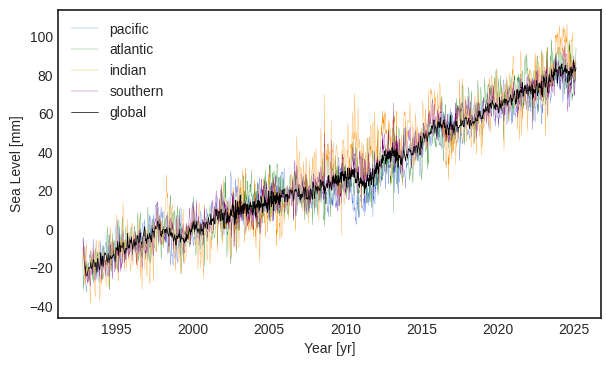

In [ ]:
ax1 = pacific.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="royalblue", linewidth=0.2, figsize=(7, 4), label = "pacific")
atlantic.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="forestgreen", linewidth=0.2, ax=ax1, label="atlantic")
indian.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="darkorange", linewidth=0.2, ax=ax1, label="indian")
southern.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="purple", linewidth=0.2, ax=ax1, label="southern")
noaa.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="black", linewidth=0.5, ax=ax1, label="global")

plt.legend()
plt.show()

<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

As we observe the plot, it depicts the sea level variations from different oceanic regions - Pacific, Atlantic, Indian, and Southern Oceans, and the global sea level trend from around 1993 to 2025. Each ocean basin is represented with different colored lines, while the global trend is depicted in black.

*   It can be observed that the overall sea level has been increasing over time. Though it is not monotonical increase, there is an upward trend.
*   Individual ocean basins show fluctuations. The Indian and Southern Oceans display the most variability in the short term.
*   The black line representing the global sea level trend, appears smoother compared to the regional trends, which means that averaging across all ocean basins reduces short-term fluctuations.
*   The variability in sea levels appears to increase after 2010, i.e., that short-term fluctuations have become more pronounced in recent years.










This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV (again, <u>without</u> downloading the data) into a DataFrame called `csiro` and take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each year and add those values to the `csiro` DataFrame as a column called `"min_level"`.</b>

In [ ]:
csiro = pd.read_csv("https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv")
csiro["min_level"] = csiro[["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]].min(axis=1)
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880,0.000000,-0.952756,0.952756,NaN,0.000000
1,1881,0.220472,-0.732283,1.173228,NaN,0.220472
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.440945
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.232283
4,1884,0.590551,-0.283465,1.464567,NaN,0.590551


Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of `min_level` at the 120th element from `min_level`, then multiply the result by `2.54 * 10` (the inches to millimeters conversion), and put the result into a new column called `"adjusted_min_level"`.</b>

In [ ]:
min_level_2000 = csiro["min_level"].iloc[119] #120th element is in 119 index.
csiro["adjusted_min_level"] = (csiro["min_level"] - min_level_2000) * 2.54 * 10
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level
0,1880,0.000000,-0.952756,0.952756,NaN,0.000000,-176.099649
1,1881,0.220472,-0.732283,1.173228,NaN,0.220472,-170.499649
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.440945,-187.299648
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.999648
4,1884,0.590551,-0.283465,1.464567,NaN,0.590551,-161.099649


Run the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [ ]:
# csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]
#the year column is not a string, it is int.
type(csiro["Year"].iloc[0])
csiro["year_int"] = csiro["Year"]
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int
0,1880,0.000000,-0.952756,0.952756,NaN,0.000000,-176.099649,1880
1,1881,0.220472,-0.732283,1.173228,NaN,0.220472,-170.499649,1881
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.440945,-187.299648,1882
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.999648,1883
4,1884,0.590551,-0.283465,1.464567,NaN,0.590551,-161.099649,1884


<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

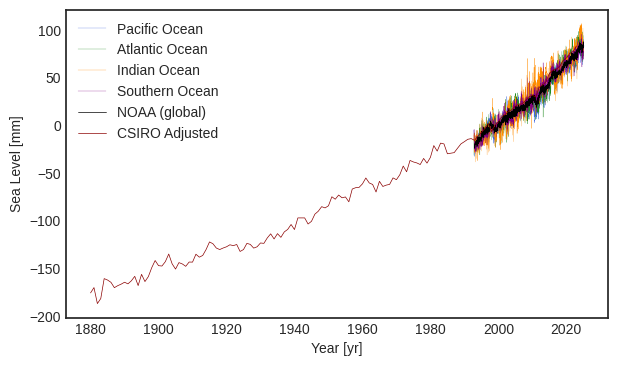

In [ ]:
ax1 = pacific.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="royalblue", linewidth=0.2, figsize=(7, 4), label = "Pacific Ocean")
atlantic.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="forestgreen", linewidth=0.2, ax=ax1, label="Atlantic Ocean")
indian.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="darkorange", linewidth=0.2, ax=ax1, label="Indian Ocean")
southern.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="purple", linewidth=0.2, ax=ax1, label="Southern Ocean")
noaa.plot("year", "max_level", kind="line",
               xlabel="Year [yr]", ylabel="Sea Level [mm]",
               color="black", linewidth=0.5, ax=ax1, label="NOAA (global)")
csiro.plot("year_int", "adjusted_min_level", kind="line",
           xlabel="Year [yr]", ylabel="Sea Level [mm]",
           color="darkred", linewidth=0.5, ax=ax1, label="CSIRO Adjusted")

plt.legend()
plt.show()

### **PART 4 - Standardize the data**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called `"year"` and `"max_level"`, and one holding the CSIRO data with columns called `"year_int"` and `"adjusted_min_level"`.  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of `"year"` and `"max_level"` from the NOAA dataframe and the mean and standard deviation of the `"year_int"` and `"adjusted_min_level"` from the CSIRO dataframe.</b>

In [ ]:
#NOAA Dataframe
noaa_year_mean = noaa['year'].mean()
noaa_year_stddev = noaa['year'].std()
noaa_max_level_mean = noaa['max_level'].mean()
noaa_max_level_stddev = noaa['max_level'].std()

#CSIRO Dataframe
csiro_year_mean = csiro['year_int'].mean()
csiro_year_stddev = csiro['year_int'].std()
csiro_min_level_mean = csiro['adjusted_min_level'].mean()
csiro_min_level_stddev = csiro['adjusted_min_level'].std()


<b>Create columns in your NOAA dataframe called `"year_st"` and `"max_level_st"` that are standardized versions of `"year"` and `"max_level"`.</b>

In [ ]:
#Standardizing the NOAA data
noaa["year_st"] = (noaa["year"] - noaa_year_mean) / noaa_year_stddev
noaa["max_level_st"] = (noaa["max_level"] - noaa_max_level_mean) / noaa_max_level_stddev
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level,year_st,max_level_st
0,1992.9614,-19.33,NaN,NaN,NaN,NaN,-19.33,-1.950362,-1.785883
1,1992.9865,-22.59,NaN,NaN,NaN,NaN,-22.59,-1.947559,-1.899034
2,1993.0123,-24.03,NaN,NaN,NaN,NaN,-24.03,-1.944679,-1.949016
3,1993.0406,-23.94,NaN,NaN,NaN,NaN,-23.94,-1.941519,-1.945892
4,1993.0641,-24.22,NaN,NaN,NaN,NaN,-24.22,-1.938894,-1.955610


 <b>Create columns in your CSIRO dataframe called `"year_int_st"` and `"adjusted_min_level_st"` that are standardized versions of `"year_int"` and `"adjusted_min_level"`.</b>

In [ ]:
#Standardizing the CSIRO data
csiro['year_int_st'] = (csiro['year_int'] - csiro_year_mean) / csiro_year_stddev
csiro['adjusted_min_level_st'] = (csiro['adjusted_min_level'] - csiro_min_level_mean) / csiro_min_level_stddev
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st
0,1880,0.000000,-0.952756,0.952756,NaN,0.000000,-176.099649,1880,-1.714081,-1.450227
1,1881,0.220472,-0.732283,1.173228,NaN,0.220472,-170.499649,1881,-1.690108,-1.370770
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.440945,-187.299648,1882,-1.666135,-1.609142
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.999648,1883,-1.642162,-1.533941
4,1884,0.590551,-0.283465,1.464567,NaN,0.590551,-161.099649,1884,-1.618189,-1.237395


<b>Make a plot of the standardized NOAA global data.</b>

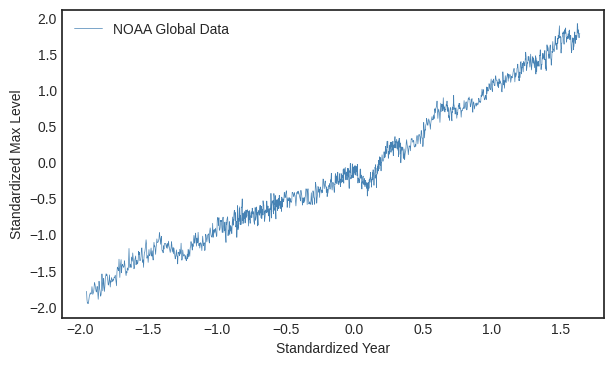

In [ ]:
ax = noaa.plot("year_st", "max_level_st",
               xlabel="Standardized Year",
               ylabel="Standardized Max Level",
               color="steelblue", label="NOAA Global Data", linewidth=0.5, figsize=(7, 4))
plt.legend()
plt.show()

<b>Make a plot of the standardized CSIRO data.</b>

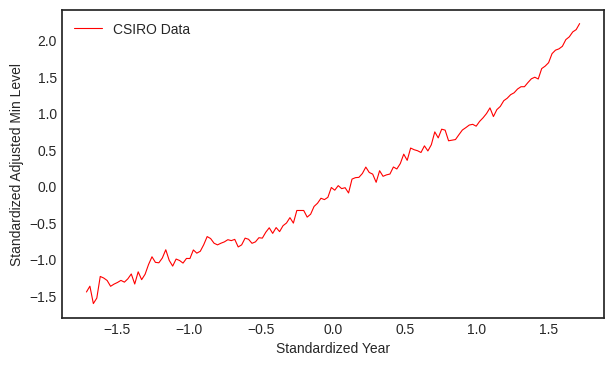

In [ ]:
ax = csiro.plot("year_int_st", "adjusted_min_level_st",
                xlabel="Standardized Year",
                ylabel="Standardized Adjusted Min Level",
                color="red", label="CSIRO Data", linewidth=0.8, figsize=(7, 4))
plt.legend()
plt.show()

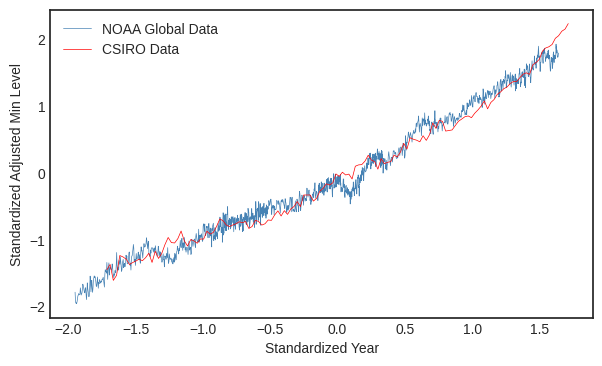

In [ ]:
#showing both the graph on the same plot
ax2 = noaa.plot("year_st", "max_level_st",
               xlabel="Standardized Year",
               ylabel="Standardized Max Level",
               color="steelblue", label="NOAA Global Data", linewidth=0.5, figsize=(7, 4))
csiro.plot("year_int_st", "adjusted_min_level_st",
                xlabel="Standardized Year",
                ylabel="Standardized Adjusted Min Level",
                color="red", label="CSIRO Data", linewidth=0.5, figsize=(7, 4), ax=ax2)
plt.legend()
plt.show()

### **PART 5 - Fit and compare models between NOAA and CSIRO**

<b>Import `SGDRegressor` from `sklearn` and run a regression model on the NOAA global data using the default parameters.</b>

In [ ]:
lm_noaa_st = SGDRegressor()
lm_noaa_st.fit(noaa[["year_st"]], noaa["max_level_st"])

SGDRegressor()

<Axes: xlabel='year_st', ylabel='Standardized Max Level'>

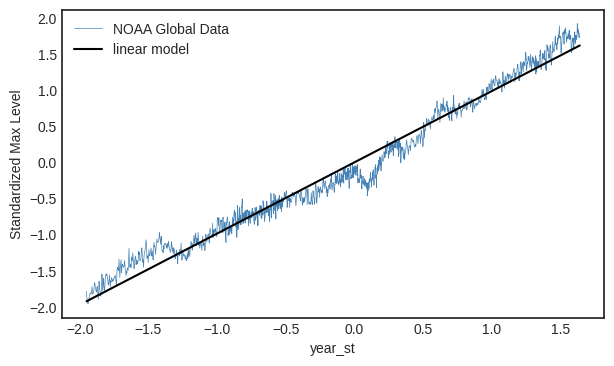

In [ ]:
model_noaa_st = lm_noaa_st.predict(noaa[["year_st"]])
noaa["model_noaa_st"] = model_noaa_st
noaa.head()

# -- plot the standardized data
ax3 = noaa.plot("year_st", "max_level_st",
               xlabel="Standardized Year",
               ylabel="Standardized Max Level",
               color="steelblue", label="NOAA Global Data", linewidth=0.5, figsize=(7, 4))

# -- add the model
noaa.plot("year_st", "model_noaa_st", label="linear model", color="black", ax=ax3)

<b>"Unstandardize" this model as we did in class by multiplying by the standard deviation and adding the average of the unstandardized data set.</b>

In [ ]:
#unstandardizing the NOAA
model_noaa =  model_noaa_st * noaa_max_level_stddev + noaa_max_level_mean
noaa["model_noaa"] = model_noaa
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,max_level,year_st,max_level_st,model_noaa_st,model_noaa
0,1992.9614,-19.33,NaN,NaN,NaN,NaN,-19.33,-1.950362,-1.785883,-1.923301,-23.289149
1,1992.9865,-22.59,NaN,NaN,NaN,NaN,-22.59,-1.947559,-1.899034,-1.920539,-23.209556
2,1993.0123,-24.03,NaN,NaN,NaN,NaN,-24.03,-1.944679,-1.949016,-1.917699,-23.127745
3,1993.0406,-23.94,NaN,NaN,NaN,NaN,-23.94,-1.941519,-1.945892,-1.914584,-23.038005
4,1993.0641,-24.22,NaN,NaN,NaN,NaN,-24.22,-1.938894,-1.955610,-1.911998,-22.963487


<b>Calculate the Mean Squared Error (MSE) and $R^2$ for this model.</b>

In [ ]:
mse = np.mean((noaa["max_level"] - noaa["model_noaa"])**2)
print("MSE = {0:0.3}".format(mse))

r2 = 1 - np.var(noaa["max_level"] - noaa["model_noaa"]) / np.var(noaa["max_level"])
print("R-squared = {0:0.2}".format(r2))

r2 = r2_score(noaa["max_level"], noaa["model_noaa"])
print("R-squared from sklearn = {0:0.2}".format(r2))

MSE = 20.8
R-squared = 0.97
R-squared from sklearn = 0.97


<b>Overplot this model on the global NOAA data using `plotly.express`.</b>

In [ ]:
labs = {"year" : "Year [yr]",
        "max_level" : "Maximum Level [mm]",
        "model_noaa" : "linear model for NOAA"}
fig1_1 = px.line(noaa, "year", "max_level", labels = labs)
fig1_1.update_traces(line_color="steelblue", showlegend=True, name = "NOAA")
# fig1_1.show()

fig1_2 = px.line(noaa, "year", "model_noaa", labels=labs)
fig1_2.update_traces(line_color="red", showlegend=True, name = "Linear model for NOAA")
# fig1_2.show()

#adding linear model to the data
fig1_1.add_traces(fig1_2.data)
fig1_1.show()


<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the MSE and $R^2$ for this model.</b>

<Axes: xlabel='year_int_st', ylabel='Standardized Adjusted Minimum Level'>

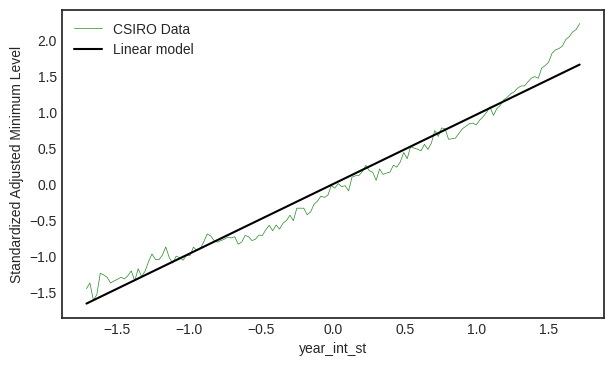

In [ ]:
lm_csiro_st = SGDRegressor()
lm_csiro_st.fit(csiro[["year_int_st"]], csiro["adjusted_min_level_st"])


model_csiro_st = lm_csiro_st.predict(csiro[["year_int_st"]])
csiro["model_csiro_st"] = model_csiro_st
csiro.head()

# -- plot the standardized data
ax4 = csiro.plot("year_int_st", "adjusted_min_level_st",
               xlabel="Standardized Year",
               ylabel="Standardized Adjusted Minimum Level",
               color="forestgreen", label="CSIRO Data", linewidth=0.5, figsize=(7, 4))

# -- add the model
csiro.plot("year_int_st", "model_csiro_st", label="Linear model", color="black", ax=ax4)

In [ ]:
#unstandardizing the CSIRO
model_csiro =  model_csiro_st * csiro_min_level_stddev + csiro_min_level_mean
csiro["model_csiro"] = model_csiro
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st,model_csiro_st,model_csiro
0,1880,0.000000,-0.952756,0.952756,NaN,0.000000,-176.099649,1880,-1.714081,-1.450227,-1.656844,-190.661606
1,1881,0.220472,-0.732283,1.173228,NaN,0.220472,-170.499649,1881,-1.690108,-1.370770,-1.633661,-189.027669
2,1882,-0.440945,-1.346457,0.464567,NaN,-0.440945,-187.299648,1882,-1.666135,-1.609142,-1.610477,-187.393732
3,1883,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.999648,1883,-1.642162,-1.533941,-1.587293,-185.759796
4,1884,0.590551,-0.283465,1.464567,NaN,0.590551,-161.099649,1884,-1.618189,-1.237395,-1.564110,-184.125859


In [ ]:
mse = np.mean((csiro["adjusted_min_level"] - csiro["model_csiro"])**2)
print("MSE = {0:0.3}".format(mse))

r2 = 1 - np.var(csiro["adjusted_min_level"] - csiro["model_csiro"]) / np.var(csiro["adjusted_min_level"])
print("R-squared = {0:0.2}".format(r2))

r2 = r2_score(csiro["adjusted_min_level"], csiro["model_csiro"])
print("R-squared from sklearn = {0:0.2}".format(r2))

MSE = 1.5e+02
R-squared = 0.97
R-squared from sklearn = 0.97


<b>Overplot this model on the CSIRO data using `plotly.express`.</b>

In [ ]:
labs1 = {"year" : "Year [yr]",
        "adjusted_min_level" : "Maximum Level [mm]",
        "model_csiro" : "linear model for CSIRO"}
fig2_1 = px.line(csiro, "year_int", "adjusted_min_level", labels = labs1)
fig2_1.update_traces(line_color="forestgreen", showlegend=True, name = "CSIRO")
# fig2_1.show()

fig2_2 = px.line(csiro, "year_int", "model_csiro", labels=labs1)
fig2_2.update_traces(line_color="red", showlegend=True, name = "Linear model for CSIRO")
# fig2_2.show()

#adding linear model to the data
fig2_1.add_traces(fig2_2.data)
fig2_1.show()


<b>

Comment on the above plots by answering the following questions:  

1. Which data is better fit by a linear model and why do you think that is?
2. What are the rates of sea level rise for each model?
3. What are the predictions for each model for sea level in 2100?
4. What approximations have we made that may or may not be accurate?
5. How do your findings relate and compare to the information in the resources you identified in Part 1 above?

</b>

ANSWERS:
1. When both the model fits are observed, it is seen that the NOAA data is better fit by a linear model, than that for the CSIRO data.
*   It can be seen that, in the CSIRO data, there are a lot of deviations from the fit, than in NOAA data.
*   There is a complete upward and linear trend in NOAA data, while the linearity is missing, in the CSIRO data, in the extreme ends of the curve. Probably, an exponential fit can be a better one for this data.
*   Another reason for the linear trend in NOAA could be that the data is from the recent years (1995-2025) that it is covering a shorter span of time, while the data in CSIRO is from a very long time (1880-2020) which is more than a century time span. Over the century, there could be increase in the global warming, which could be the reason for a non-linear upward trend with the CSIRO data.
*   Also, NOAA data used the satellites, which are more precise; while CSIRO data relied on tide gauges, which can have noise or errors.








In [ ]:
#2
print("Answer for the Question 2 :")
sealevel_riserate_noaa = lm_noaa_st.coef_[0]
sealevel_riserate_csiro = lm_csiro_st.coef_[0]
print("The rate of sea level rise for NOAA model = {0:0.4}".format(sealevel_riserate_noaa), "mm/yr")
print("The rate of sea level rise for CSIRO model = {0:0.4}".format(sealevel_riserate_csiro), "mm/yr")

Answer for the Question 2 :
The rate of sea level rise for NOAA model = 0.9857 mm/yr
The rate of sea level rise for CSIRO model = 0.9671 mm/yr


In [ ]:
#3
print("Answer for the Question 3 :")
sea_level_noaa_2100 = lm_noaa_st.coef_[0] * 2100 + lm_noaa_st.intercept_[0]
print("Predicted sea level in 2100 for NOAA = {0:.2f} mm".format(sea_level_noaa_2100))

sea_level_csiro_2100 = lm_csiro_st.coef_[0] * 2100 + lm_csiro_st.intercept_[0]
print("Predicted sea level in 2100 for CSIRO = {0:.2f} mm".format(sea_level_csiro_2100))


Answer for the Question 3 :
Predicted sea level in 2100 for NOAA = 2069.94 mm
Predicted sea level in 2100 for CSIRO = 2030.84 mm


Answer for question 4:
*   We assumed that the sea level rise follows a linear trend
*   We assumed that the data is accurate. In fact, there will be precision issues.
*   Standardization can cause the errors and outliers to affect the model.
*   We have only considered the golbal (NOAA) as a generalised measure, ignoring all teh regional measures; specific regions could have higher or lower sea level rise.





Answer for question 5:
**1. Historical sea level measurement methods**
- The NOAA & CSIRO data sources rely on tide gauges and satellite altimetry, which are standard methods for measuring sea level.  
- Historical measurements used tide gauges, which can be affected by land subsidence or uplift. This is the reason why satellite data more reliable for long-term trends.  
- Our linear model assumes a steady rate of sea level rise, but historical records suggest fluctuations due to climate patterns like El Niño and La Niña.  

Our findings match historical methods when we used the CSIRO data, but older tide gauge data may have more local biases, while satellites provide a more global perspective.  

**2. Variability in sea level measurements across the globe**
- Our model treats global sea level rise uniformly, but there are significant regional differences.  
- Factors such as ocean currents, land subsidence, gravitational effects, and glacial melt distribution cause sea levels to rise faster in some areas than others.  
- NOAA and CSIRO datasets focus on global trends, but localized sea level rise can be much higher in places like the U.S. East Coast and Pacific Islands.  

The external references likely highlight regional variations that our linear model does not capture.

**3. Projections and implications for the future**  
- Our model predicts a sea level rise of ~2000–2100 mm (2m) by 2100, assuming a constant rate.  
- Scientific projections, such as IPCC reports, suggest that sea level rise is accelerating, which means that our linear model may underestimate future increases. There may be exponential increment but not linear increment.
- The actual rise by 2100 depends on greenhouse gas emissions, ice sheet stability, and climate policies.  

Our findings give a first-order approximation, but climate models used in scientific literature incorporate nonlinear acceleration and scenario-based projections  like the best-case vs. worst-case emissions.  


Our analysis provides a solid baseline estimate but lacks the complexity of real-world sea level rise dynamics. By incorporating nonlinear models, regional variability, and scenario-based forecasting can better align with scientific literature.

<b>Perform a linear regression on each 30 year interval in the CSIRO data starting from 1880 (i.e, 1880-1910, 1881-1911, 1882-1912, etc).  Make a plot of the slope that is fit for each interval as a function of time.  What are the implications of this plot?</b>


TEXT FOR ANSWER HERE